# H5 data visualization

In [1]:
import h5py

import os, sys

sys.path.append(os.path.abspath('../scripts'))
from utils import *

In [2]:
data = []
label = []

data_train_path = os.path.abspath('../dataset/db_aug_v2_20181019_ndb_aug_v2_20181020/train.h5')
data_test_path = os.path.abspath('../dataset/db_aug_v2_20181019_ndb_aug_v2_20181020/test.h5')
data_vali_path = os.path.abspath('../dataset/db_aug_v2_20181019_ndb_aug_v2_20181020/vali.h5')

data_train, label_train = load_h5(data_train_path)
data_test, label_test = load_h5(data_test_path)
data_vali, label_vali = load_h5(data_vali_path)

data.append(data_train)
data.append(data_vali)
data.append(data_test)

label.append(label_train)
label.append(label_vali)
label.append(label_test)


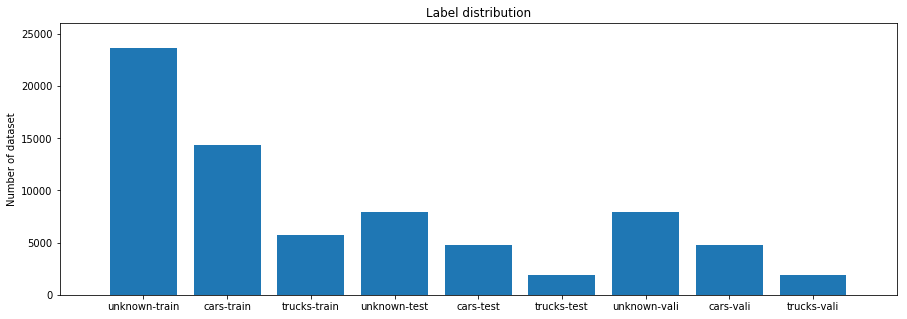

In [3]:
""" Data statistics"""

label_list = [0,1,2]

import numpy as np
import matplotlib.pyplot as plt

y_val = []
for i in range( len ( data) ):
    for j in range ( len ( label_list ) ):
        y_val.append(np.sum(label[i] == label_list[j]))

x_name=('unknown-train', 'cars-train', 'trucks-train', 
        'unknown-test', 'cars-test', 'trucks-test', 
        'unknown-vali', 'cars-vali', 'trucks-vali')

index = range( len(x_name) )

plt.figure(figsize=(15,5))
plt.bar(index, y_val, tick_label=x_name, align='center')
plt.ylabel('Number of dataset')
plt.title('Label distribution')
plt.xlim( -1, len(x_name))
plt.ylim( 0, np.max(y_val) * 1.1 )
plt.show()

In [36]:
""" Visualization """

data_sel = 0 ## train: 0, test: 1, vali: 2
j = 0 ## index

label_dict = ['unknown', 'cars', 'trucks']

idx_list = []

for k in range( len(label_dict) ):

    idx = np.array(   range(  len( data[data_sel] )  )   )
    idx = idx[label[data_sel] == k]
    idx = idx[j]
    
    idx_list.append(idx)

cloud_list = []
for idx in idx_list:
    cloud_list.append(data[data_sel][idx])

%matplotlib qt

fig = plt.figure(figsize=(15,5))
    
# display point cloud
for i, cloud in enumerate(cloud_list):

    ax = fig.add_subplot(131 + i, projection='3d')
    ax = display_point_cloud_box_ax(ax, cloud)
    ax.set_title("class: {}".format(label_dict[i]))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
plt.show()



In [39]:
j += 1

idx_list = []

for k in range( len(label_dict) ):

    idx = np.array(   range(  len( data[data_sel] )  )   )
    idx = idx[label[data_sel] == k]
    idx = idx[j]
    
    idx_list.append(idx)

cloud_list = []
for idx in idx_list:
    cloud_list.append(data[data_sel][idx])

%matplotlib qt

fig = plt.figure(figsize=(15,5))
    
# display point cloud
for i, cloud in enumerate(cloud_list):

    ax = fig.add_subplot(131 + i, projection='3d')
    ax = display_point_cloud_box_ax(ax, cloud)
    ax.set_title("class: {}".format(label_dict[i]))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
plt.show()
